In [1]:
import nbsetup
import seaborn as sns
import numpy as np
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis
from models.equations import null_gravity

In [2]:
from models.load import load_sparc
simulations = load_sparc(namespace='sparc_scalar')

In [3]:
NULL_TYPE = 5
NAME = 'EXPERIMENT'
DATASET = 'Quality'
FAST = True
null_func = null_gravity

In [4]:
from references.sparc import adjustment_df
adj = adjustment_df()

In [5]:
default = Result(simulations=simulations, null_type=NULL_TYPE)

In [22]:
df = default.datasets()[DATASET].query('rel_R > 0.1')
aa = Analysis(mcmc(df, velocity=False, null_func=null_func, train_inc=False, train_d=True, train_y=True, train_tau=False, tight={'Inc': 5, 'Ydisk': 5, 'Ybul': 5, 'D': 1.5}), null_function=null_func, name=NAME)

In [23]:
aa.Result(simulations=simulations, fast=FAST, null_type=NULL_TYPE)

In [24]:
if FAST: display(aa.uni)
else: aa.plot_posterior()

{'gamma': array(44.31303043), 'alpha': array(0.31598216)}

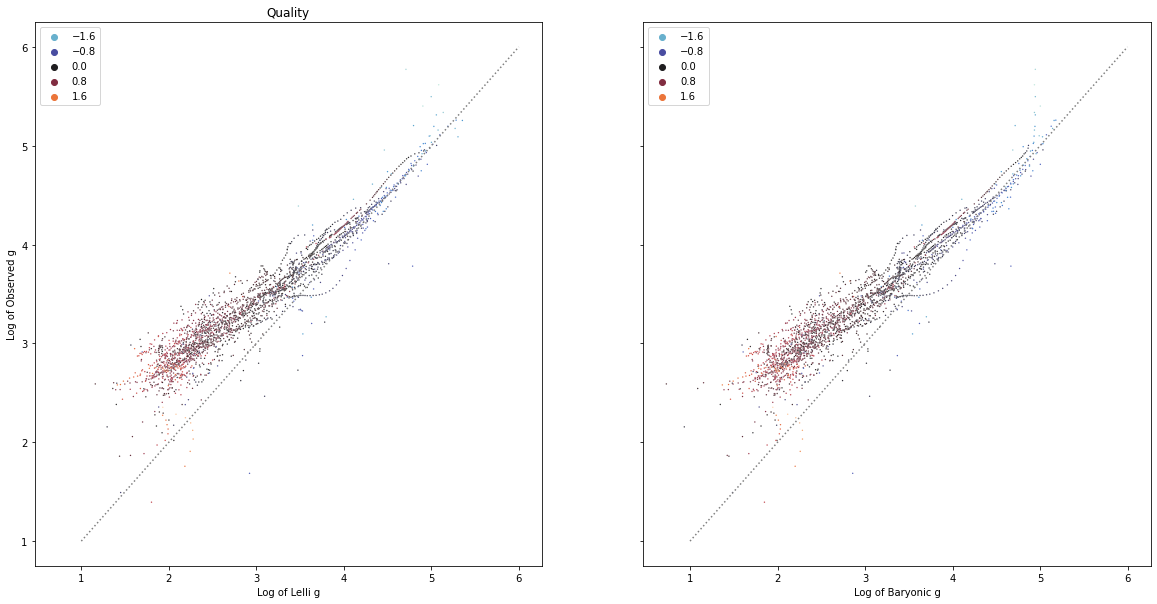

In [25]:
default.plot_rar(kind=0, query_key=DATASET)

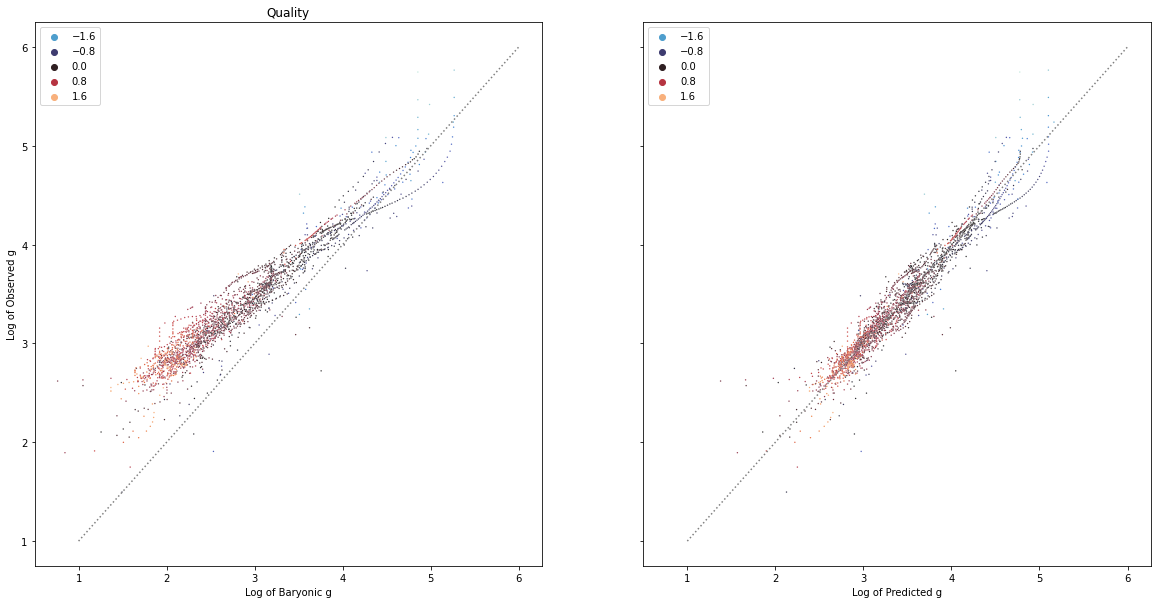

In [26]:
aa.result.plot_rar(kind=0, query_key=DATASET, idens=('S','P'))

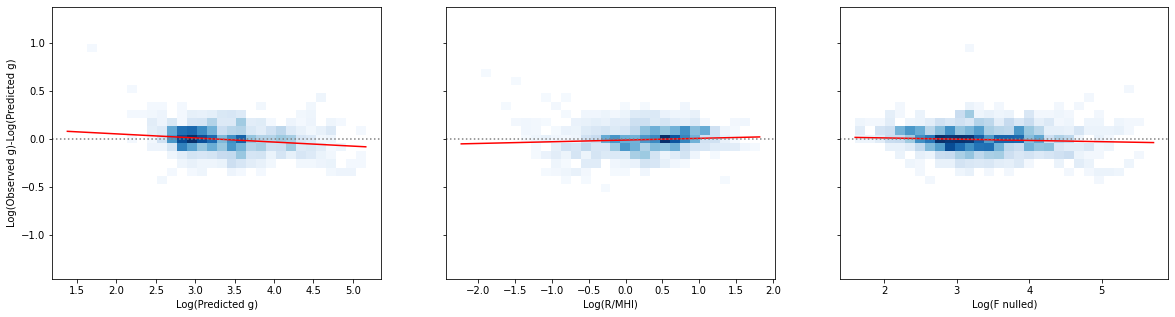

In [27]:
aa.result.plot_residuals(query_key=DATASET)

In [28]:
df = default.dataframe

<AxesSubplot:ylabel='Count'>

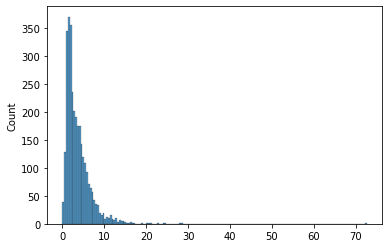

In [29]:
obsboost=df['gobs']/df['Sgbar']
sns.histplot(obsboost)


[None, (0.0, 1.1)]

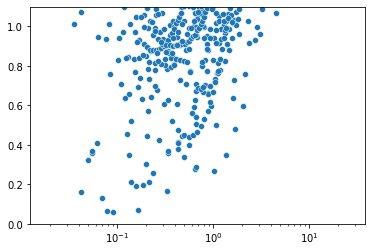

In [30]:
sns.scatterplot(x=df['R']/df['Reff'], y=obsboost).set(xscale='log', ylim=(0,1.1))

<AxesSubplot:ylabel='Count'>

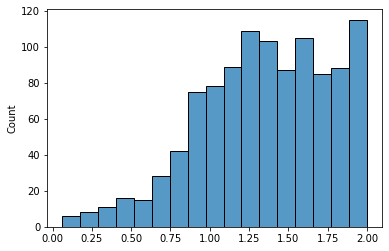

In [31]:
sns.histplot(obsboost[obsboost<2])

[(0.0, 10.0)]

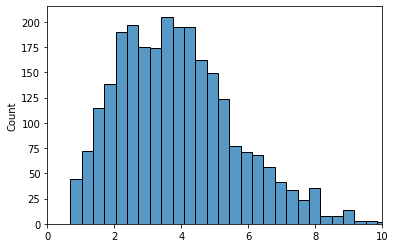

In [32]:
df = aa.result.dataframe
gboost=df['Pgbar']/df['Sgbar']
sns.histplot(gboost).set(xlim=(0,10))

[None, (0.0, 1.1)]

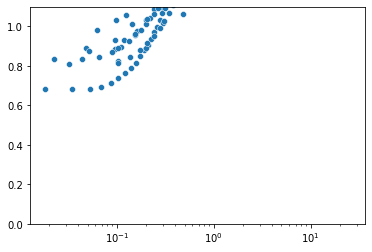

In [33]:
sns.scatterplot(x=df['R']/df['Reff'], y=gboost).set(xscale='log', ylim=(0,1.1))

<AxesSubplot:ylabel='Count'>

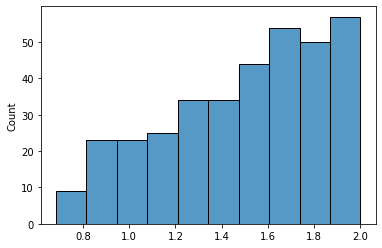

In [34]:
sns.histplot(gboost[gboost<2])

KeyError: 'Ydisk_sparc'

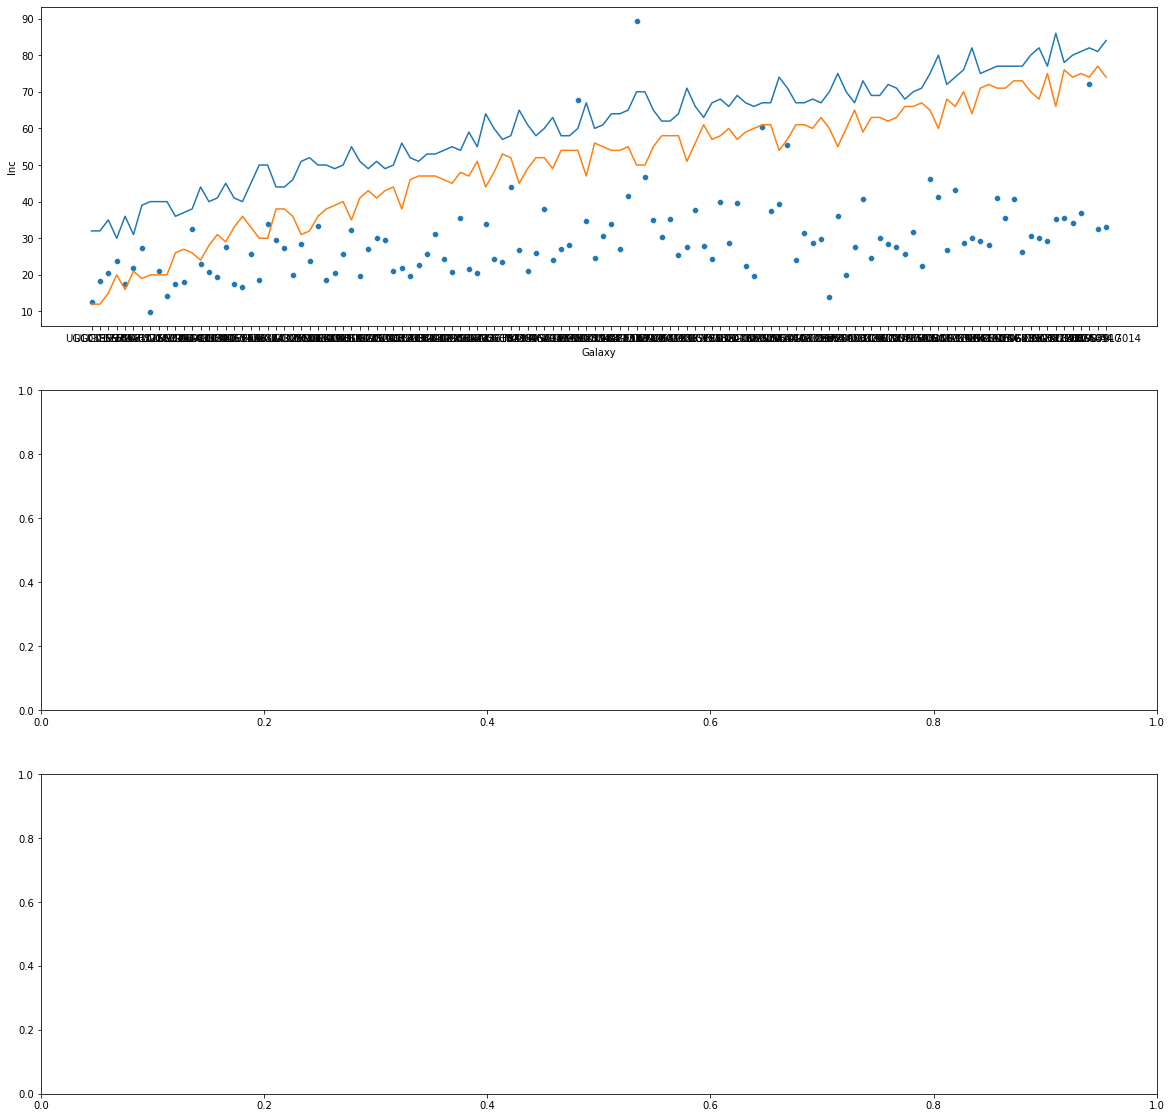

In [19]:
import matplotlib.pyplot as plt
from references.sparc import adjustment_df
import seaborn as sns

def plot_nuissance(adjs, params=['Inc']):
    

    fig, axes = plt.subplots(len(params), 1, figsize=(20,20))
    if len(params) == 1: axes = [axes]
    def_adjs = adjustment_df()
    select_params = ['Galaxy']
    for p in params:
        select_params.append('e_%s' % p)
        select_params.append(p)
    
    joined = adjs.set_index("Galaxy").join(def_adjs.query("Source=='SPARC'")[select_params].set_index('Galaxy'), rsuffix='_sparc').reset_index()
    for i, p in enumerate(params):
        joined = joined.sort_values('%s_sparc' % p)
        galaxy = joined['Galaxy']
        adjustment = joined[p]
        sparc = joined['%s_sparc' % p]
        error = joined['e_%s' % p]
        sns.scatterplot(x=galaxy, y=adjustment, ax=axes[i])
        sns.lineplot(x=galaxy, y=sparc+error, ax=axes[i])
        sns.lineplot(x=galaxy, y=sparc-error, ax=axes[i])

plot_nuissance(aa.adjs, ['Inc', 'Ydisk', 'Ybul'])

In [24]:
df = aa.result.dataframe

[None]

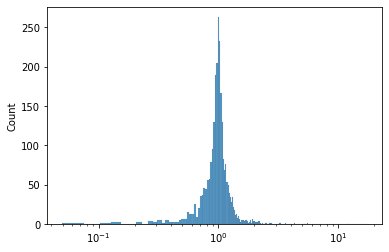

In [31]:
sns.histplot(df['Pgbar']/df['gobs']).set(xscale='log')

<AxesSubplot:ylabel='Count'>

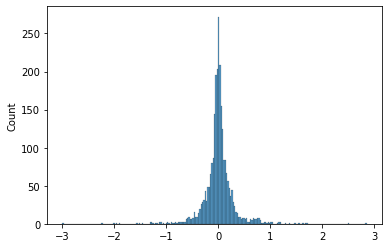

In [32]:
sns.histplot(np.log(df['Pgbar']/df['gobs']))

In [34]:
df['gboost'] = df['Pgbar']/df['Sgbar']

In [252]:
df['gdm'] = (df['gobs']-df['Sgbar'])/(df['gobs']-df['Pgbar'])

In [15]:
m,v = df['gboost'].mean(), df['gboost'].std()
m,v,m-v,m+v

(0.015000533191063445,
 0.021045349059317636,
 -0.006044815868254191,
 0.03604588225038108)

[None, None]

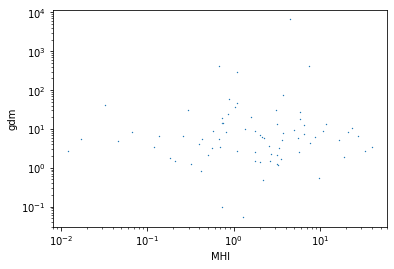

In [257]:
gdf = df.groupby('Galaxy')
x = gdf['MHI'].mean()
y = gdf['gdm'].mean()
e = gdf['gdm'].std()
g = sns.scatterplot(x=x, y=y, s=2)
g.set(xscale='log', yscale='log')
#g.errorbar(x, y, yerr=e, fmt='.k')

<AxesSubplot:xlabel='gboost', ylabel='Count'>

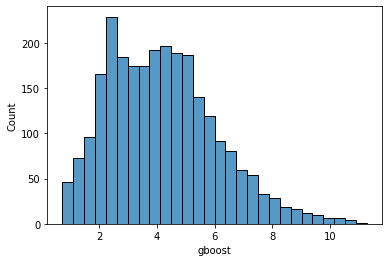

In [35]:
sns.histplot(df['gboost'])

<AxesSubplot:xlabel='mhi_R', ylabel='gboost'>

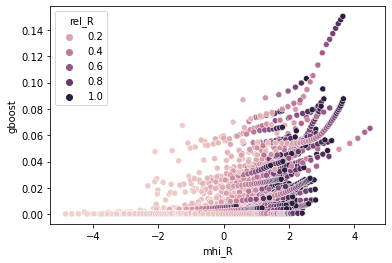

In [17]:
sns.scatterplot(x=np.log(df['mhi_R']), y=df['gboost'], hue=df['rel_R'])

In [275]:
import scipy as sp

<ErrorbarContainer object of 3 artists>

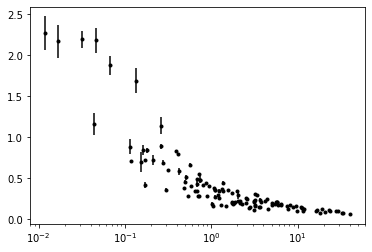

In [277]:
slope = []
stderr = []
x = []
for gui, gdf in df.groupby('Galaxy'):
    line = sp.stats.linregress(gdf['R'], gdf['gboost'])#null_gravity(1, gdf['Fnulled'], **aa.uni))
    slope.append(line.slope)
    stderr.append(line.stderr)
    x.append(gdf['MHI'].mean())

g = sns.scatterplot(x=x, y=slope, s=1)
g.set(xscale='log')
g.errorbar(x, slope, yerr=stderr, fmt='.k')

In [44]:
df.columns

Index(['R', 'Vobs', 'e_Vobs', 'Vgas', 'Vdisk', 'Vbul', 'SBgas', 'SBdisk',
       'SBbul', 'Galaxy', 'D', 'e_D', 'Inc', 'e_Inc', 'Vflat', 'e_Vflat', 'Q',
       'MHI', 'L[3.6]', 'Reff', 'Ydisk', 'e_Ydisk', 'Ybul', 'e_Ybul', 'Ygas',
       'e_Ygas', 'tau', 'Vbar', 'Vgbar', 'gobs', 'Fnewton_disk', 'Fabs_disk',
       'F_abs', 'Fnulled_disk', 'Sdisk', 'Fnewton_gas', 'Fabs_gas',
       'Fnulled_gas', 'Sgas', 'Fnewton', 'Fabs', 'Fnulled', 'Sgbar', 'Sbar',
       'VSdiff', 'VSdiffabs', 'rel_R', 'mhi_R', 'Fnewton_bul', 'Fabs_bul',
       'Fnulled_bul', 'Sbul', 'Pgbar', 'Pbar'],
      dtype='object')

In [46]:
df['gobs']

0        73.624749
1       169.959139
2       240.603726
3       320.598906
4       392.688463
           ...    
2583    577.748101
2584    595.599990
2585    588.849150
2586    513.381080
2587    578.330771
Name: gobs, Length: 2588, dtype: float64

In [15]:
adjs = adjustment_df()

In [19]:
import pandas as pd

In [20]:
adjs = adjs[adjs['Galaxy'].isin(aa.adjs['Galaxy'])]
adjs = pd.concat([adjs,aa.adjs], ignore_index=True)

In [29]:


import numpy as np

def plot_comparison(dfs, what_sources, compare, to_source='SPARC', sort=None, x_sort='Galaxy'):
    fig, axes = plt.subplots(3, 1, figsize=(20,10))
    
    # sort correctly
    to_df = dfs[dfs['Source']==to_source].sort_values(compare)
    indx = to_df.set_index(x_sort)
    indx['sort'] = np.arange(len(indx))
    
    for i, what_source in enumerate(what_sources):
        what_df = dfs[dfs['Source']==what_source]
        
        # 1. Absolutes
        ax = axes[0]
        
        # continue sort for both what's
        what_df = what_df.join(indx[['sort']], on=x_sort).sort_values('sort')
        
        # only plot reference once
        if i == 0:
            tx, ty, te = to_df[x_sort], to_df[compare], to_df["e_%s" % compare]
            ax.fill_between(tx, ty-2*te, ty+2*te, color='whitesmoke')
            ax.fill_between(tx, ty-te, ty+te, color='lightgrey')
            sns.lineplot(x=tx, y=ty, label=to_source, color='grey', ax=ax)
            sns.scatterplot(x=tx, y=ty, color='grey', ax=ax)
        
        color = ['teal', 'orange'][i]
        wx, wy, we = what_df[x_sort], what_df[compare], what_df["e_%s" % compare]    
        g = sns.scatterplot(data=what_df, x=wx, y=compare, label=what_source, ax=ax, color=color)
        g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
        
        ax.set(xticklabels=[])
        
        # 2. Ratios
        ax = axes[1]
        yy = np.array(wy)/np.array(ty)
        if i == 0:
            ax.fill_between(tx, (ty-2*te)/ty, (ty+2*te)/ty, color='whitesmoke')
            ax.fill_between(tx, (ty-te)/ty, (ty+te)/ty, color='lightgrey')
        sns.scatterplot(x=tx, y=yy, ax=ax, color=color)
        ax.set(xticklabels=[])
        
        # 3. Histogram
        ax = axes[2]
        sns.histplot(yy, ax=ax, color=color)



[None]

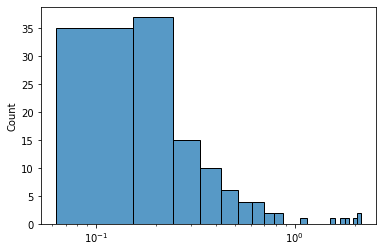

In [83]:
sns.histplot(y).set(xscale='log')

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_12853/479782517.py:33: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)


ValueError: operands could not be broadcast together with shapes (0,) (122,) 

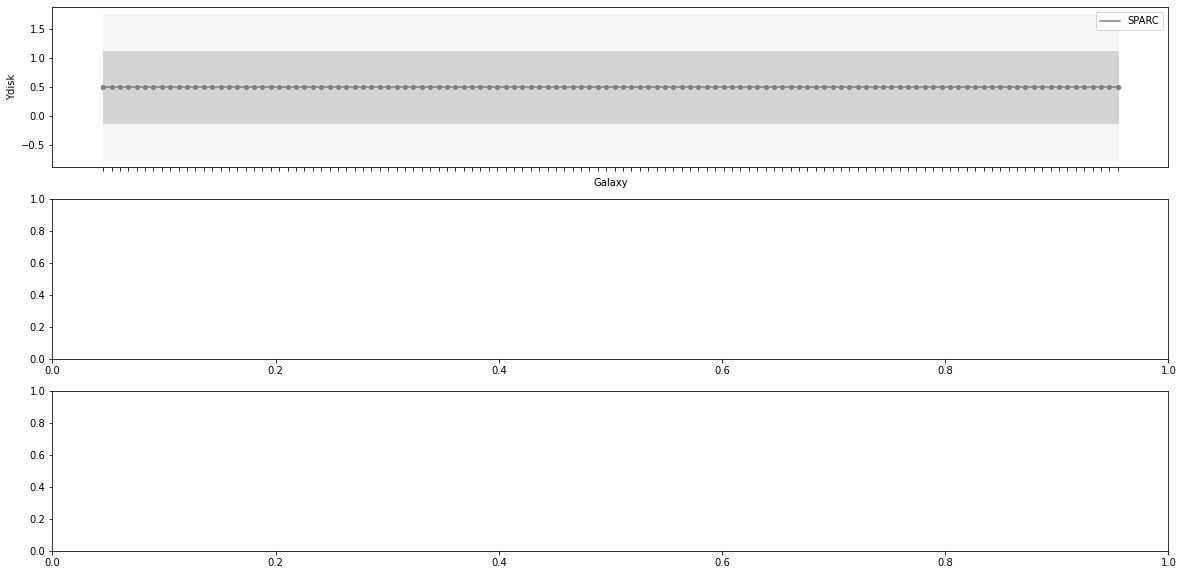

In [30]:
plot_comparison(adjs, ('None'), 'Ydisk')

[None, (0.0, 2.0)]

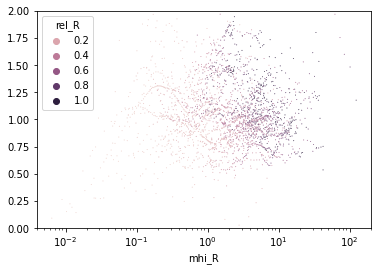

In [58]:
sns.scatterplot(x=df['mhi_R'], y=df['Pgbar']/df['gobs'], s=1, hue=df['rel_R']).set(xscale='log', ylim=(0,2))